## SRJ

In [1]:
import pennylane as qml
import numpy as np

v1 = 1/np.sqrt(2)*np.array([0,0,-1,1])
v2 = 1/np.sqrt(2)*np.array([0,1,1,0])

import pennylane as qml

circ = qml.device("default.qubit",wires = 6)

@qml.qnode(circ)
def inner(v1,v2):
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 3)
    qml.adjoint(qml.S(wires = 3))
    qml.ctrl(qml.StatePrep(v2,wires = [1,2]),control = 0)
    qml.ctrl(qml.StatePrep(v2,wires = [4,5]),control = 3)
    qml.ctrl(qml.adjoint(qml.StatePrep(v1,wires = [1,2])),control = 0)
    qml.ctrl(qml.adjoint(qml.StatePrep(v1,wires = [4,5])),control = 3)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 3)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(3))

inner(v1,v2)
print(qml.draw(inner, max_length=100)(v1, v2))

0: ──H─╭●───╭●─────H───────┤  <Z>
1: ────├|Ψ⟩─├|Ψ⟩†──────────┤     
2: ────╰|Ψ⟩─╰|Ψ⟩†──────────┤     
3: ──H──S†──╭●────╭●─────H─┤  <Z>
4: ─────────├|Ψ⟩──├|Ψ⟩†────┤     
5: ─────────╰|Ψ⟩──╰|Ψ⟩†────┤     


In [2]:
import pennylane as qml
import numpy as np

v1 = 1/np.sqrt(2)*np.array([0,0,1,1])
v2 = 1/np.sqrt(2)*np.array([0,1,1,0])

import pennylane as qml

circ = qml.device("default.qubit",wires = 4)

@qml.qnode(circ)
def inner(v1,v2):
    qml.Hadamard(wires = 0)
    #qml.Hadamard(wires = 3)
    #qml.adjoint(qml.S(wires = 3))
    qml.ctrl(qml.StatePrep(v2,wires = [1,2]),control = 0)
    #qml.ctrl(qml.StatePrep(v2,wires = [4,5]),control = 3)
    qml.ctrl(qml.adjoint(qml.StatePrep(v1,wires = [1,2])),control = 0)
    #qml.ctrl(qml.adjoint(qml.StatePrep(v1,wires = [4,5])),control = 3)
    qml.Hadamard(wires = 0)
    #qml.Hadamard(wires = 3)
    return qml.state()

inner(v1,v2)
print(qml.draw(inner, max_length=100)(v1, v2))

ash = inner(v1, v2)
print('ash:', ash)
qubits = 4

dev4 = qml.device("lightning.qubit", wires=qubits, shots=1000)
@qml.qnode(dev4)
def measurement(ash):
    qml.StatePrep(ash, wires=range(qubits))
    return qml.counts()  # Samples all qubits

counts = measurement(ash)
print(counts)

0: ──H─╭●───╭●─────H─┤  State
1: ────├|Ψ⟩─├|Ψ⟩†────┤  State
2: ────╰|Ψ⟩─╰|Ψ⟩†────┤  State
ash: [ 7.50000000e-01+0.j  0.00000000e+00+0.j -2.50000000e-01+0.j
  0.00000000e+00+0.j -6.31965379e-17+0.j  0.00000000e+00+0.j
 -3.53553391e-01+0.j  0.00000000e+00+0.j  2.50000000e-01+0.j
  0.00000000e+00+0.j  2.50000000e-01+0.j  0.00000000e+00+0.j
  6.31965379e-17+0.j  0.00000000e+00+0.j  3.53553391e-01+0.j
  0.00000000e+00+0.j]
{'0000': 574, '0010': 53, '0110': 111, '1000': 60, '1010': 61, '1110': 141}


In [10]:
import pennylane as qml
import numpy as np

c2state = np.array([1,1,0,0])
hf_state = np.array([0,0,1,1])

v1=hf_state
v2 = c2state

import pennylane as qml

circ = qml.device("default.qubit",wires = 5)



@qml.qnode(circ)
def inner(v1,v2):
    qml.Hadamard(wires = 0)
    qml.ctrl(qml.BasisState(v2,wires = [1,2,3,4]),control = 0)
    qml.ctrl(qml.adjoint(qml.BasisState(v1,wires = [1,2,3,4])),control = 0)
    qml.Hadamard(wires = 0)
    return qml.state()

inner(v1,v2)
print(qml.draw(inner, max_length=100)(v1, v2))

ash = inner(v1, v2)
print(ash)
qubits=5



dev4 = qml.device("lightning.qubit", wires=qubits, shots=1000)
@qml.qnode(dev4)
def measurement(ash):
    qml.StatePrep(ash, wires=range(qubits))
    return qml.counts(all_outcomes = False)  # Samples all qubits

counts = measurement(ash)
print(counts)

0: ──H─╭●───╭●─────H─┤  State
1: ────├|Ψ⟩─├|Ψ⟩†────┤  State
2: ────├|Ψ⟩─├|Ψ⟩†────┤  State
3: ────├|Ψ⟩─├|Ψ⟩†────┤  State
4: ────╰|Ψ⟩─╰|Ψ⟩†────┤  State
[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j
  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.5+0.j]
{'00000': 269, '01111': 246, '10000': 254, '11111': 231}


In [ ]:
import pennylane as qml
import numpy as np

c2state = np.array([1,1,0,0])
hf_state = np.array([0,0,1,1])

v1=hf_state
v2 = c2state

import pennylane as qml

circ = qml.device("default.qubit",wires = 5)

@qml.qnode(circ)
def inner(v1, v2):
    qml.Hadamard(wires=0)
    
    # Prepare |v2⟩ if control=1, |v1⟩ if control=0
    qml.ctrl(qml.BasisEmbedding, control=0)(features=v2, wires=[1,2,3,4])
    qml.ctrl(qml.BasisEmbedding, control=0)(features=v1, wires=[1,2,3,4])
    
    qml.Hadamard(wires=0)
    return qml.state()

inner(v1,v2)
print(qml.draw(inner, max_length=100)(v1, v2))

ash = inner(v1, v2)
print(ash)
qubits=5



dev4 = qml.device("lightning.qubit", wires=qubits, shots=1000)
@qml.qnode(dev4)
def measurement(ash):
    qml.StatePrep(ash, wires=range(qubits))
    return qml.counts(all_outcomes = False)  # Samples all qubits

counts = measurement(ash)
print(counts)


0: ──H─╭●───╭●────H─┤  State
1: ────├|Ψ⟩─├|Ψ⟩────┤  State
2: ────├|Ψ⟩─├|Ψ⟩────┤  State
3: ────├|Ψ⟩─├|Ψ⟩────┤  State
4: ────╰|Ψ⟩─╰|Ψ⟩────┤  State
[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j
  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.5+0.j]
{'00000': 265, '01111': 225, '10000': 264, '11111': 246}


(<Figure size 600x400 with 1 Axes>, <Axes: >)

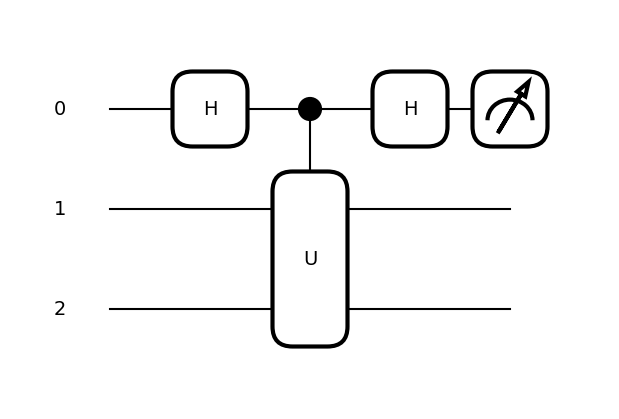

In [12]:
import pennylane as qml

dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def hadamard_test(U):
    qml.Hadamard(0)
    qml.ControlledQubitUnitary(U.matrix(), control_wires=[0], wires=[1,2])
    qml.Hadamard(0)
    return qml.expval(qml.PauliZ(0))

ham = qml.PauliX(0) @ qml.PauliZ(1)
res = hadamard_test(U=ham)
qml.draw_mpl(hadamard_test)(U=ham)

In [ ]:
import pennylane as qml
import numpy as np

# Define states (normalized)
hf_state = np.array([0, 0, 1, 1])  # |0011⟩ (4-qubit example)
c2_state = np.array([1, 1, 0, 0])  # |1100⟩

# Device with 1 control qubit + 4 target qubits
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def hadamard_overlap_test():
    # Control qubit (wire 0)
    qml.Hadamard(wires=0)
    
    # Prepare |c2_state⟩ if control=1, |hf_state⟩ if control=0
    qml.ctrl(qml.BasisState, control=0)(c2_state, wires=[1, 2, 3, 4])
    qml.ctrl(qml.BasisState, control=0)(hf_state, wires=[1, 2, 3, 4])
    
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))  # Real part of ⟨HF|c2⟩


hadamard_overlap_test()


0.0